In [72]:
import numpy as np
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn 
from pandas.api.types import CategoricalDtype
sns.set(style="ticks", color_codes=True)

In [73]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-79V6INH\DANIEL1;"
                      "Database=pharmacy_1;"
                      "Trusted_Connection=yes;")

In [74]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM dbo.pro_1')
full_data=cursor

In [76]:
df = pd.read_sql( 'SELECT * FROM dbo.pro_1',conn)
df.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq  
0  1000084527       20110         1  3.56    60  
1  1999004071       20120         1  0.35    30  
2  1999003192       20120         1  0.51    30  
3  1999001402       20110         1   7.7     8  
4  1999001542       20120         1  0.16    30

In [77]:
df['sku'] = df['sku'].astype(int)

### merge_pharma_1p

In [78]:
import pandas as pd

df1 = pd.read_csv (r'C:\Users\DANIEL\Documents\DataScience\data\pharma_1p.csv')
df1.head()

sku form  q_pac                    pharmaco_3 pharmaco_c
0  1000001081  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
1  1000001082  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
2  1000001083  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
3  1000001618  TAB     30  LIPID MODIFYING AGENTS PLAIN       C10A
4  1000001689  TAB     30  LIPID MODIFYING AGENTS PLAIN       C10A

In [79]:
df1['sku'] = df1['sku'].astype(int)

In [81]:
df2 = df.merge(df1, on='sku', how='left')
df2.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq form  q_pac  \
0  1000084527       20110         1  3.56    60  TAB   60.0   
1  1999004071       20120         1  0.35    30  TAB   30.0   
2  1999003192       20120         1  0.51    30  TAB   30.0   
3  1999001402       20110         1   7.7     8  INJ    5.0   
4  1999001542       20120         1  0.16    30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

In [82]:
df2.shape

(12628378, 15)

In [83]:
df2.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku              int32
item_name       object
genery          object
affiliation     object
customers       object
price           object
tranq           object
form            object
q_pac          float64
pharmaco_3      object
pharmaco_c      object
dtype: object

In [84]:
df3=df2
df3=df2.loc[(df2['yyyy_mm'] <= '201906')]
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq form  q_pac  \
0  1000084527       20110         1  3.56    60  TAB   60.0   
1  1999004071       20120         1  0.35    30  TAB   30.0   
2  1999003192       20120         1  0.51    30  TAB   30.0   
3  1999001402       20110         1   7.7     8  INJ    5.0   
4  1999001542       20120         1  0.16    30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

In [85]:
df3.shape

(10527735, 15)

# droping [\"\',] from values & updating data types

In [86]:
df3['tranq'] = df3['tranq'].str.replace(r"[\"\',]", '')

In [87]:
df3['price'] = df3['price'].str.replace(r"[\"\',]", '')

In [88]:
df3['tranq'] = df3['tranq'].astype(float)

In [89]:
df3['tranq'] = df3['tranq'].astype(int)

In [90]:
df3['price'] = df3['price'].astype(float)

In [91]:
df3['customers'] = df3['customers'].astype(int)

In [92]:
df3.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku              int32
item_name       object
genery          object
affiliation     object
customers        int32
price          float64
tranq            int32
form            object
q_pac          float64
pharmaco_3      object
pharmaco_c      object
dtype: object

In [93]:
dfpy = df3[['customers', 'price','tranq']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F8B8993C8>,
      dtype=object)

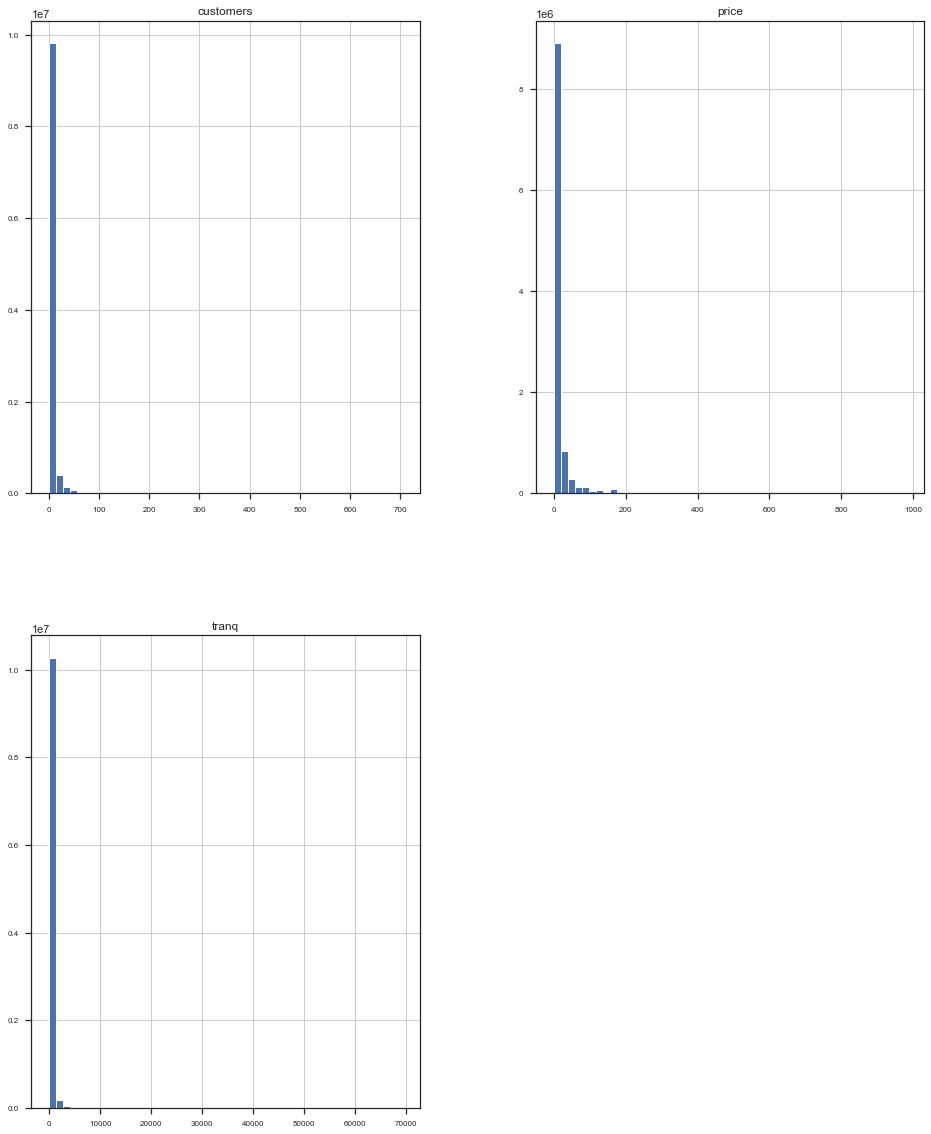

In [94]:
dfpy.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

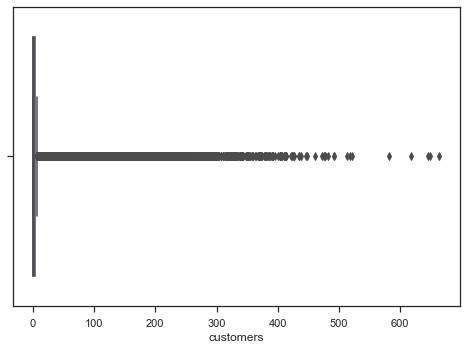

In [95]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['customers'])

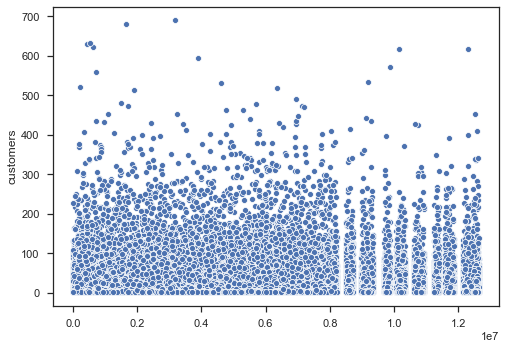

In [96]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['customers'])

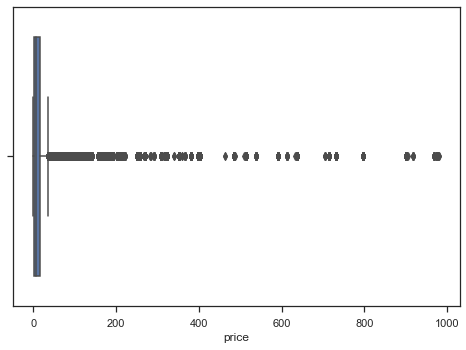

In [97]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['price'])

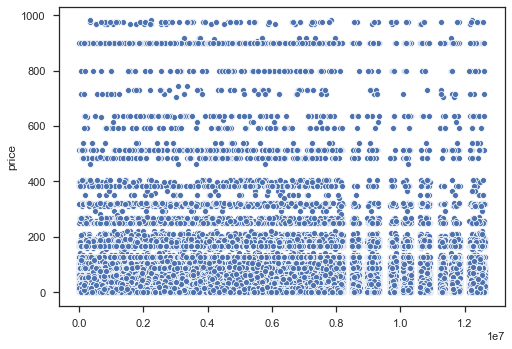

In [98]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['price'])

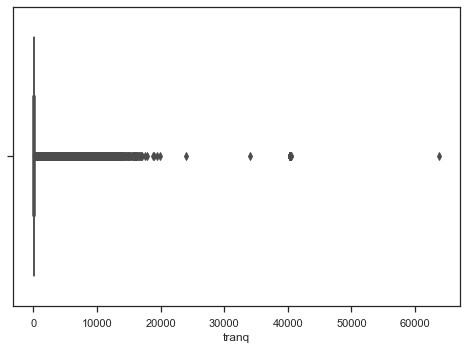

In [99]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['tranq'])

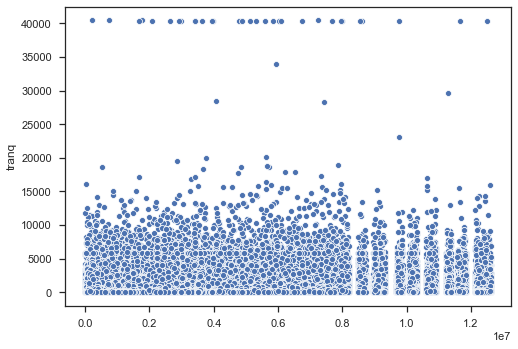

In [100]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['tranq'])

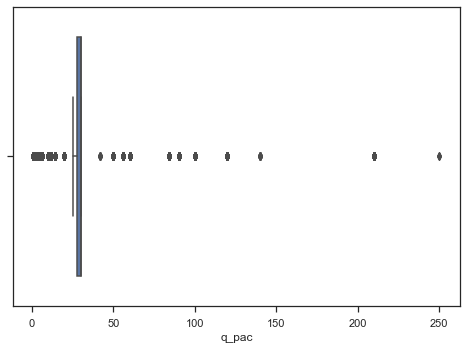

In [101]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['q_pac'])

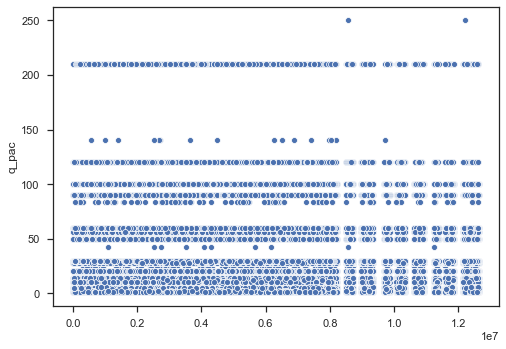

In [102]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['q_pac'])

In [103]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [18]:
#dfeda = df1[['customers','price','tranq']]

In [40]:
#from pyMechkar import exploreData
#exploreData(dfeda.sample(n = 1000000), y="tranq")

# EDA

In [30]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df3.sample(n = 1000000))
prof.to_file(output_file='output.html')
prof.to_notebook_iframe()

In [104]:
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers  price  tranq form  q_pac  \
0  1000084527       20110          1   3.56     60  TAB   60.0   
1  1999004071       20120          1   0.35     30  TAB   30.0   
2  1999003192       20120          1   0.51     30  TAB   30.0   
3  1999001402       20110          1   7.70      8  INJ    5.0   
4  1999001542       20120          1   0.16     30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

# binary encoding

## affiliation

In [105]:
s = df3['affiliation'].value_counts(normalize=True) * 100 
df3['affiliation_Binary'] = df3['affiliation'].map(s)

In [106]:
df3[['affiliation_Binary', 'affiliation']].head()

affiliation_Binary affiliation
0           20.486952       20110
1           76.558215       20120
2           76.558215       20120
3           20.486952       20110
4           76.558215       20120

## district

In [107]:
s = df3['district'].value_counts(normalize=True) * 100 
df3['district_Binary'] = df3['district'].map(s)

In [108]:
df3.sample(n = 100)[['district_Binary', 'district']].head()

district_Binary district
4125800        13.209299      477
1337784         9.035201      177
4632509        11.412844      977
7325112         8.170095      277
3375834        13.326618     1577

## pharmaco_c

In [109]:
s = df3['pharmaco_c'].value_counts(normalize=True) * 100 
df3['pharmaco_c_Binary'] = df3['pharmaco_c'].map(s)

In [110]:
df3.sample(n = 100)[['pharmaco_c_Binary', 'pharmaco_c']].head()

pharmaco_c_Binary pharmaco_c
828348                  NaN        NaN
7662936            6.343013       C08C
5163971            1.517644       C03C
12371031           1.058544       C03D
989214            11.895037       C07A

## store_code

In [111]:
s = df3['store_code'].value_counts(normalize=True) * 100 
df3['store_code_Binary'] = df3['store_code'].map(s)

In [112]:
df3.sample(n = 100)[['store_code_Binary', 'store_code']].head()

store_code_Binary store_code
7601472           0.228435       8821
1156605           0.042051       4252
1513239           0.351994       2060
7650712           0.225832       4104
5936494           0.080255       5381

# log x+1

## ['customers', 'price','tranq', 'q_pac']

In [113]:
to_log = ['customers', 'price','tranq', 'q_pac']

In [114]:
df3[to_log] = df3[to_log].applymap(lambda x: np.log(x+1)) # add columns log to dataframe

# one hot encoding

# year

In [115]:
# Get one hot encoding of columns
one_hot = pd.get_dummies(df3['year'])
df3 = df3.join(one_hot) 

## form

In [116]:
# Get one hot encoding of columns a
one_hot = pd.get_dummies(df3['form'])
df3 = df3.join(one_hot) 

In [117]:
with pd.option_context('display.precision', 2):
           df3[['affiliation_Binary','district_Binary']]

In [118]:
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers     price  ...  PEN PWD  SOL SPR SRG  \
0  1000084527       20110   0.693147  1.517323  ...    0   0    0   0   0   
1  1999004071       20120   0.693147  0.300105  ...    0   0    0   0   0   
2  1999003192       20120   0.693147  0.412110  ...    0   0    0   0   0   
3  1999001402       20110   0.693147  2.163323  ...    0   0    0   0   0   
4  1999001542       20120   0.693147  0.148420  ...    0   0    0   0   0   

   SUP  SUS  SYR  TAB  VIA  
0    0    0    0    1    0  
1    0    0    0    1    0  
2    0    0    0    1    0  
3    0    0    0    0    0  
4    0    0    0    1    0  

[5 rows x 45 columns]

# Outlier Detection

### Graphical methods

#### customers

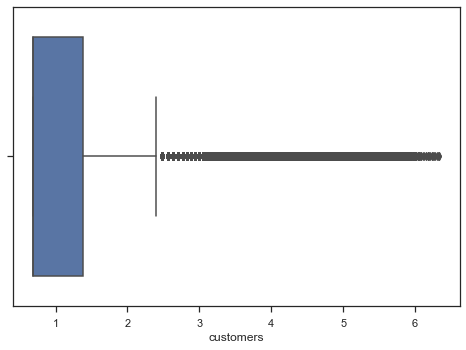

In [119]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['customers'])

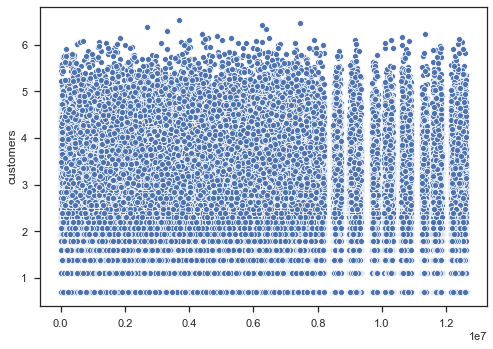

In [120]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['customers'])

### price

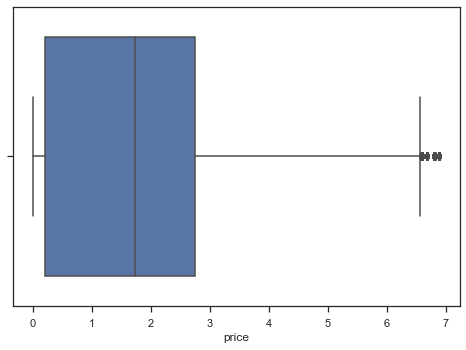

In [121]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['price'])

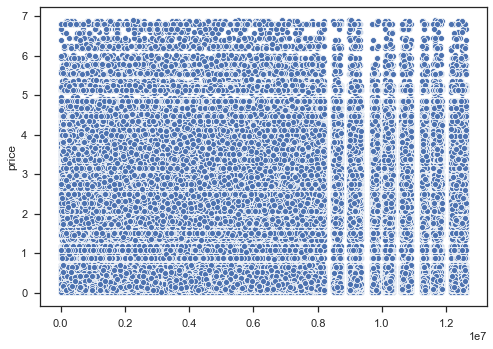

In [122]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['price'])

### tranq

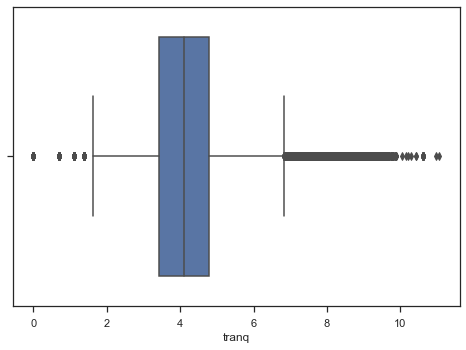

In [123]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['tranq'])

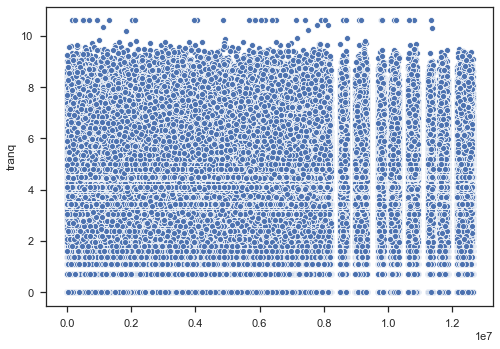

In [124]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['tranq'])

## q_pac

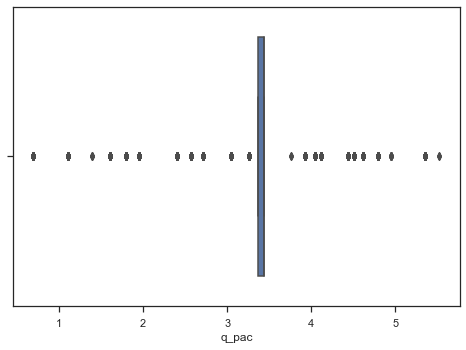

In [125]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['q_pac'])

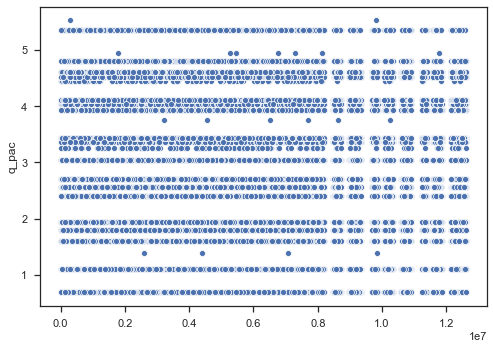

In [126]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['q_pac'])

# Missing Values

In [134]:
print(df3.isnull().sum())

year                  0
yyyy_mm               0
store_code            0
district              0
sku                   0
item_name             0
genery                0
affiliation           0
customers             0
price                 0
tranq                 0
form                  0
q_pac                 0
pharmaco_3            0
pharmaco_c            0
affiliation_Binary    0
district_Binary       0
pharmaco_c_Binary     0
store_code_Binary     0
2017                  0
2018                  0
2019                  0
AMP                   0
CAP                   0
CPL                   0
CR                    0
DRP                   0
ELX                   0
GEL                   0
GRA                   0
INF                   0
INJ                   0
LOZ                   0
OIN                   0
PAT                   0
PEN                   0
PWD                   0
SOL                   0
SPR                   0
SRG                   0
SUP                   0
SUS             

In [128]:
# Replace missing values with a number
df3['form'].fillna('TAB', inplace=True)

In [129]:
# Replace missing values with a number
df3['q_pac'].fillna(30, inplace=True)

In [130]:
# Replace missing values with a number
df3['pharmaco_3'].fillna('LIPID MODIFYING AGENTS PLAIN', inplace=True)

In [131]:
# Replace missing values with a number
df3['pharmaco_c'].fillna('C10A', inplace=True)

In [133]:
# Replace missing values with a number
df3['pharmaco_c_Binary'].fillna('1', inplace=True)

## cheking target value after imputaion

In [135]:
dfpy = df3[['tranq']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002803A0FC470>]],
      dtype=object)

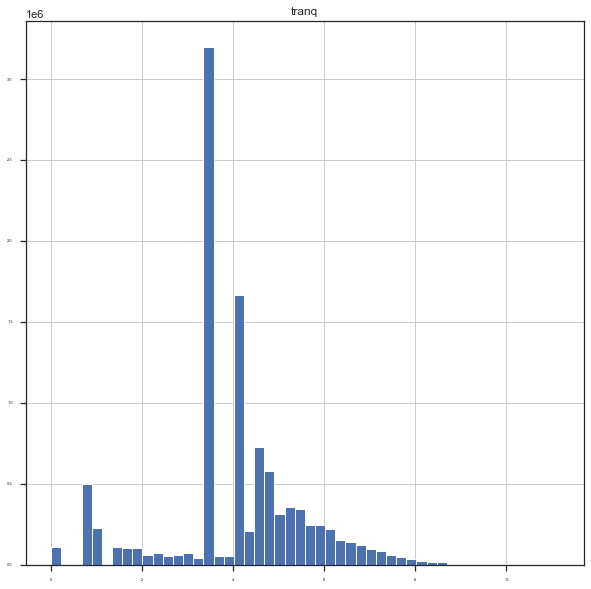

In [136]:
dfpy.hist(figsize=(10, 10), bins=50, xlabelsize=4, ylabelsize=4)

# Feature Selection